# ANALYSIS OF COVID-19 DATASET


The datasets used are the following:
 - The ECDC dataset 'https://covid.ourworldindata.org/data/ecdc/full_data.csv' 
 - The countries of the world dataset from Kaggle: 'https://www.kaggle.com/fernandol/countries-of-the-world'
 - The Historical Index of Ethnic Fractionalization Dataset (HIEF) from Harvard: 'https://dataverse.harvard.edu/api/access/datafile/3476857?format=original&gbrecs=true'
 - The 'uncover' einstein clinical dataset from Kaggle: 'https://www.kaggle.com/roche-data-science-coalition/uncover'
 
The questions I will attempt to answer are the following:

1) Which are the most hit countries, using total deaths?

2) Which are the most hit countries, using total deaths/100000 habitants

3) Are more populous countries hit?

4) What is the correlation between total deaths, habitants and GDP?

5) What is the relationship between total deaths and how diverse a country is?

6) What is the difference between the bloodwork of people with covid and people without covid?


 

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


#Loading the ECDC dataset 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
ecdc=pd.read_csv('full_data.csv', parse_dates=True) 
#Loading the populations dataset ('https://www.kaggle.com/fernandol/countries-of-the-world')
pop=pd.read_csv('countries of the world.csv')
#Loading the ethnic diversity dataset https://dataverse.harvard.edu/api/access/datafile/3476857?format=original&gbrecs=true
ed=pd.read_csv('HIEF_data.csv')
#Loading richer ecdc dataset for later use:https://covid.ourworldindata.org/data/owid-covid-data.csv
rich=pd.read_csv('owid-covid-data.csv', parse_dates=True)
#Loading the UNCOVER clinical data dataset: 
clinical=pd.read_csv('diagnosis-of-covid-19-and-its-clinical-spectrum.csv')

#Choosing the most recent day in the ecdc dataset
recent=ecdc.loc[(ecdc.date==ecdc.date.max())]

#1) Which are the most hit countries, using total deaths?

#Merging the recent DataFrame and the Population DataFrame
recent.rename(columns = {'location':'Country'}, inplace = True)
recent['Country']=recent['Country'].str.strip()
pop['Country']=pop['Country'].str.strip()
df=pd.merge(recent, pop)
df=df.set_index('Country')

#Five most hit countries:

df=df.sort_values('total_deaths', ascending=False)
print("Five most hit countries by total deaths:")
print(df.head()['total_deaths'])

#2) Which are the most hit countries, using total deaths/100000 habitants
#It seems unfair to compare little countries and big countries on the same scale
#Which is why I am creating the total deaths/100000 habitants and redoing the calculation

df['death_by_pop']=df['total_deaths']/df['Population']*100000
test=(df['death_by_pop'] > 0)
df_nozero=df.loc[test]
df_nozero= df_nozero.sort_values('death_by_pop', ascending=False)
print("Five most hit countries by total deaths/100000 inhabitants:")
print(df_nozero.head()['death_by_pop'] )

#We can notice the difference in results, though knowing San Marino's proximity to Italy, it is not surprising.






Five most hit countries by total deaths:
Country
United States     40682
Italy             23660
Spain             20453
France            19718
United Kingdom    16060
Name: total_deaths, dtype: int64
Five most hit countries by total deaths/100000 inhabitants:
Country
San Marino    133.328775
Belgium        54.754440
Spain          50.628942
Andorra        50.561088
Italy          40.699418
Name: death_by_pop, dtype: float64


c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-47-0041e89e6b2a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['Country']=recent['Country'].str.strip()


[[1.         0.18645848]
 [0.18645848 1.        ]]
[[1.         0.74508675]
 [0.74508675 1.        ]]


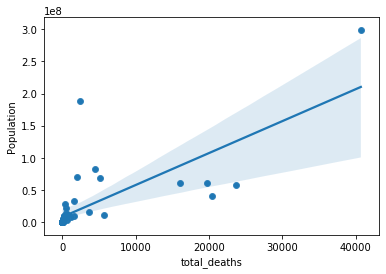

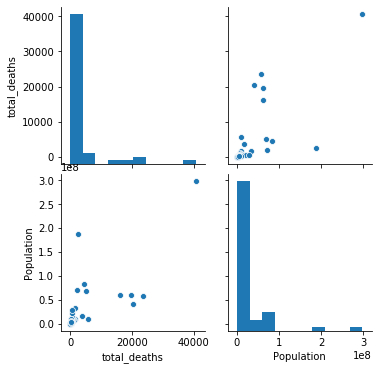

In [48]:
#3) Are more populous countries hit?
print(np.corrcoef(df_nozero.total_deaths, df_nozero.Population))
#it seems there is a slight positive correlation between population and total deaths when we consider all countries

df2=df_nozero.head(50)
print(np.corrcoef(df2.total_deaths, df2.Population))
#but when we consider the 50 most hit countries, the positive correlation spikes up to around 0.7

sns.scatterplot(df2['total_deaths'], df2['Population'])
plt.xlabel("Total Deaths")
plt.ylabel("Population")
sns.regplot(x='total_deaths', y='Population', data=df2)
plt.show()

sns.pairplot(df2[['total_deaths', 'Population']])
plt.xlabel("Total Deaths")
plt.ylabel("Population")
plt.show()



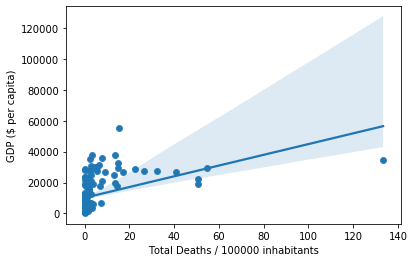

[[1.         0.44094086]
 [0.44094086 1.        ]]


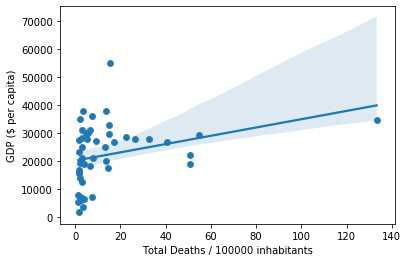

[[1.        0.2959014]
 [0.2959014 1.       ]]


In [49]:
#4) What is the correlation between total deaths/100000 habitants and GDP?

#Hypothesis: the lower the GDP, the more poorly a country fares.
#Total deaths and GDP: for all countries with deaths:
sns.scatterplot(df_nozero.death_by_pop, df_nozero['GDP ($ per capita)'])
sns.regplot(df_nozero.death_by_pop, df_nozero['GDP ($ per capita)'])
plt.xlabel("Total Deaths / 100000 inhabitants")
plt.ylabel("GDP ($ per capita)")
plt.show()
print(np.corrcoef(df_nozero.death_by_pop, df_nozero['GDP ($ per capita)']))
#A correlation of 0.4 is considered weak to moderate.
#The hypothesis is disproved since the correlation is positive: Countries with bigger GDP seem to be more hit by the covid19 pandemic.


#Total deaths and GDP: for 50 most hit countries:
sns.scatterplot(df2.death_by_pop, df2['GDP ($ per capita)'])
sns.regplot(df2.death_by_pop, df2['GDP ($ per capita)'])
plt.xlabel("Total Deaths / 100000 inhabitants")
plt.ylabel("GDP ($ per capita)")
plt.show()
print(np.corrcoef(df2.death_by_pop, df2['GDP ($ per capita)']))
#There is very little correlation between GDP and Death by 100000 habitants.

In [50]:
#5) What is the relationship between total deaths and ethnic diversity in a country ?

test= (ed.Year == ed.Year.max())
ed_recent=ed.loc[test]
ed_recent=ed_recent.drop('Year', axis=1)
ed_recent['Country']=ed_recent['Country'].str.strip()
ed_recent=ed_recent.sort_values('Country')
ed_recent=ed_recent.set_index('Country')

#Which are the most ethnically diverse countries in this dataset?
print("The most ethnically diverse countries in this dataset:")
print(ed_recent.sort_values('EFindex', ascending=False).head(10))

#And the least diverse?
print("The least ethnically diverse countries in this dataset:")
print(ed_recent.sort_values('EFindex').head(10))



The most ethnically diverse countries in this dataset:
               EFindex
Country               
Liberia          0.889
Uganda           0.883
Togo             0.880
Nepal            0.860
South Africa     0.856
Chad             0.855
Kenya            0.855
Mali             0.852
Nigeria          0.850
Guinea-Bissau    0.808
The least ethnically diverse countries in this dataset:
                                       EFindex
Country                                       
Japan                                    0.019
Democratic People's Republic of Korea    0.020
Bangladesh                               0.025
Tunisia                                  0.034
Egypt                                    0.041
Jordan                                   0.044
Armenia                                  0.045
Comoros                                  0.054
Poland                                   0.069
Republic of Korea                        0.095


Relationship between diversity and death rate: all countries:


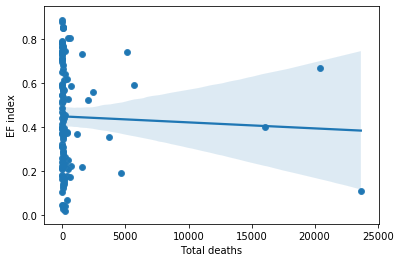

[[ 1.         -0.03666517]
 [-0.03666517  1.        ]]
Relationship between diversity and death rate by 100000 inhabitants: all countries:


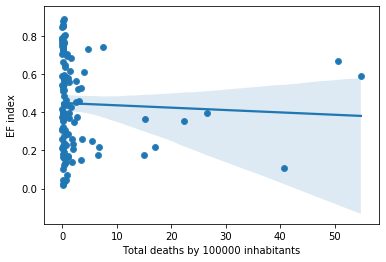

[[ 1.         -0.04313169]
 [-0.04313169  1.        ]]
Relationship between diversity and death rate: 50 first countries:


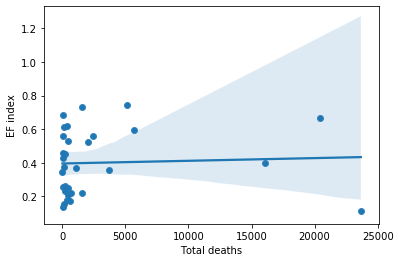

[[1.        0.0500401]
 [0.0500401 1.       ]]
Relationship between diversity and death rate by 100000 inhabitants: 50 first countries:


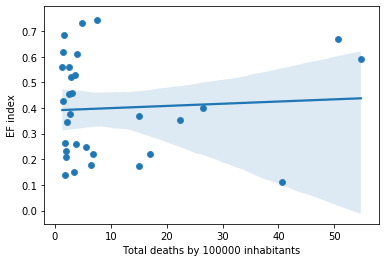

[[1.        0.0641344]
 [0.0641344 1.       ]]


In [51]:
#Merging the two datasets:
df3=ed_recent.merge(df_nozero, left_index=True, right_index=True)

#Relationship between diversity and death rate: all countries:
print("Relationship between diversity and death rate: all countries:")
sns.scatterplot(df3.total_deaths, df3.EFindex)
sns.regplot(df3.total_deaths, df3.EFindex)
plt.xlabel("Total deaths")
plt.ylabel("EF index")
plt.show()
print(np.corrcoef(df3.total_deaths, df3.EFindex))

#Relationship between diversity and death rate by 100000 habitants: all countries:
print("Relationship between diversity and death rate by 100000 inhabitants: all countries:")
sns.scatterplot(df3.death_by_pop, df3.EFindex)
sns.regplot(df3.death_by_pop, df3.EFindex)
plt.xlabel("Total deaths by 100000 inhabitants")
plt.ylabel("EF index")
plt.show()
print(np.corrcoef(df3.death_by_pop, df3.EFindex))

#Same two but with the 50 most hit countries:
print("Relationship between diversity and death rate: 50 first countries:")
df3=ed_recent.merge(df_nozero.head(50), left_index=True, right_index=True)
#Relationship between diversity and death rate: 50:
sns.scatterplot(df3.total_deaths, df3.EFindex)
sns.regplot(df3.total_deaths, df3.EFindex)
plt.xlabel("Total deaths")
plt.ylabel("EF index")
plt.show()
print(np.corrcoef(df3.total_deaths, df3.EFindex))

#Relationship between diversity and death rate by 100000 habitants: 50:
print("Relationship between diversity and death rate by 100000 inhabitants: 50 first countries:")

sns.scatterplot(df3.death_by_pop, df3.EFindex)
sns.regplot(df3.death_by_pop, df3.EFindex)
plt.xlabel("Total deaths by 100000 inhabitants")
plt.ylabel("EF index")
plt.show()
print(np.corrcoef(df3.death_by_pop, df3.EFindex))

#In all cases, it seems ethnic diversity is completely unrelated to the death toll of the virus.


In [52]:
#clinical data
#6) What is the difference between the bloodwork of people with covid and people without covid?
#The attempt is to find the variables in the bloodwork whose mean differs by more than 1 between covid patients and other patients.
clinical = clinical.rename(columns = {"patient_addmited_to_semi_intensive_unit_1_yes_0_no": "addmited_semi_intensive", 
                                  "patient_addmited_to_regular_ward_1_yes_0_no":"addmited_regular", 
                                  "patient_addmited_to_intensive_care_unit_1_yes_0_no": "addmited_intensive"}) 

clinical= clinical.replace('f', 0)
clinical= clinical.replace('t', 1)
print(clinical.describe())


sick=clinical.loc[clinical['sars_cov_2_exam_result'] == 'positive' ]
healthy=clinical.loc[clinical['sars_cov_2_exam_result'] == 'negative' ]

sick.describe()



       patient_age_quantile  addmited_regular  addmited_semi_intensive  \
count           5644.000000       5644.000000              5644.000000   
mean               9.318391          0.013997                 0.008859   
std                5.777903          0.117489                 0.093713   
min                0.000000          0.000000                 0.000000   
25%                4.000000          0.000000                 0.000000   
50%                9.000000          0.000000                 0.000000   
75%               14.000000          0.000000                 0.000000   
max               19.000000          1.000000                 1.000000   

       addmited_intensive    hematocrit    hemoglobin     platelets  \
count         5644.000000  6.030000e+02  6.030000e+02  6.020000e+02   
mean             0.007264 -2.186214e-09 -1.601319e-08 -3.535003e-10   
std              0.084929  1.000830e+00  1.000830e+00  1.000832e+00   
min              0.000000 -4.501420e+00 -4.345603

,patient_age_quantile,addmited_regular,addmited_semi_intensive,addmited_intensive,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,558.000000,558.000000,558.000000,558.000000,83.000000,83.000000,83.000000,81.000000,83.000000,83.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,9.000000,1.000000,13.000000
mean,10.630824,0.064516,0.014337,0.014337,0.248097,0.262254,-0.705840,0.275231,0.303373,-0.038107,...,0.136139,-0.336207,0.135437,0.326704,-0.258837,-0.221931,0.324335,-0.343363,-0.532989,0.277553
std,4.920180,0.245891,0.118982,0.118982,0.797130,0.827838,0.647726,0.897249,0.960428,0.873055,...,1.084992,0.374433,0.686604,0.358232,0.774522,0.798182,1.197331,0.658195,NaN,0.937606
min,0.000000,0.000000,0.000000,0.000000,-1.777679,-1.651396,-2.062515,-1.896609,-1.661031,-1.694489,...,-1.999560,-0.765332,-1.327899,-0.224899,-1.519125,-1.546844,-1.054307,-1.532932,-0.532989,-1.153251
25%,6.000000,0.000000,0.000000,0.000000,-0.415809,-0.366948,-1.095256,-0.325903,-0.400461,-0.679533,...,-0.202809,-0.590135,-0.251104,0.028615,-0.872898,-0.848024,-0.799338,-0.011744,-0.532989,-0.639426
50%,11.000000,0.000000,0.000000,0.000000,0.350958,0.416252,-0.718402,0.235063,0.278308,-0.073970,...,0.481668,-0.359614,-0.091579,0.354563,-0.378725,-0.354739,0.247995,-0.011744,-0.532989,0.182693
75%,15.000000,0.000000,0.000000,0.000000,0.934617,0.886172,-0.335267,0.796029,0.930631,0.557179,...,0.695567,-0.147534,0.666165,0.644294,0.153461,0.220760,0.950140,-0.011744,-0.532989,0.902048
max,19.000000,1.000000,1.000000,1.000000,1.655607,1.919995,1.756275,2.703313,2.975753,2.152110,...,1.337265,0.525589,1.224503,0.849520,1.217834,1.289544,2.205371,-0.011744,-0.532989,1.826932


In [53]:
healthy.describe()


,patient_age_quantile,addmited_regular,addmited_semi_intensive,addmited_intensive,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
count,5086.000000,5086.000000,5086.000000,5086.000000,520.000000,520.000000,519.000000,518.000000,519.000000,519.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,11.000000,19.000000,14.000000
mean,9.174400,0.008455,0.008258,0.006488,-0.039600,-0.041860,0.112880,-0.043038,-0.048516,0.006094,...,-0.126415,0.312192,-0.125763,-0.303368,0.240349,0.206079,-0.301168,0.280933,0.028052,-0.257728
std,5.846888,0.091568,0.090506,0.080297,1.024715,1.020205,1.001574,1.010104,0.999518,1.020407,...,0.976998,1.315109,1.267433,1.323865,1.180668,1.180613,0.742109,1.208511,1.046183,1.056822
min,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,...,-1.400642,-1.244817,-3.082674,-3.568877,-2.925618,-2.985592,-1.175907,-1.401959,-1.480526,-2.900254
25%,4.000000,0.000000,0.000000,0.000000,-0.587474,-0.586244,-0.504851,-0.774677,-0.603210,-0.743500,...,-1.154658,-0.368835,-0.410629,-0.418053,-0.036606,-0.066989,-0.804241,-0.231251,-0.532989,-0.305440
50%,9.000000,0.000000,0.000000,0.000000,0.019074,-0.022340,0.022745,-0.101517,-0.003778,0.002791,...,0.096651,-0.073767,0.028065,0.155373,0.286508,0.200207,-0.473763,-0.011744,-0.059221,0.028546
75%,14.000000,0.000000,0.000000,0.000000,0.694287,0.666876,0.644554,0.683835,0.622100,0.608353,...,0.738350,0.301983,0.716016,0.306274,0.638131,0.714045,-0.068754,0.317518,0.296105,0.439605
max,19.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,...,1.166148,3.236524,1.703078,1.042674,1.940087,2.029471,1.538530,2.841856,2.862350,0.799283


In [54]:
clinical_diff=clinical.groupby('sars_cov_2_exam_result').mean().diff()
clinical_diff=clinical_diff.loc['positive', :]

clinical_1=clinical_diff[abs(clinical_diff) > 1]
print("Variables in the bloodwork whose mean differs by more than 1 between covid patients and other patients.")
print(clinical_1)

#It seems either the data is incomplete or there is a flaw in the thinking since only one variable meets the criteria (the age)
#By narrowing down to a difference in mean of 0.5, I have found more results.
print("Variables in the bloodwork whose mean differs by more than 0.5 between covid patients and other patients.")
clinical_05=clinical_diff[abs(clinical_diff) >= 0.5]
print(clinical_05)

print("It mignt be useful to consider these variables more closely in the proccess of understanding the disease.")


Variables in the bloodwork whose mean differs by more than 1 between covid patients and other patients.
patient_age_quantile    1.456424
Name: positive, dtype: float64
Variables in the bloodwork whose mean differs by more than 0.5 between covid patients and other patients.
patient_age_quantile                1.456424
platelets                          -0.818720
leukocytes                         -0.836818
eosinophils                        -0.558663
monocytes                           0.571967
ionized_calcium                    -0.938920
segmented                           0.642866
ferritin                            0.641919
pco2_arterial_blood_gas_analysis   -0.648399
ph_arterial_blood_gas_analysis      0.630072
po2_arterial_blood_gas_analysis     0.625503
arteiral_fio2                      -0.624296
phosphor                           -0.561041
cto2_arterial_blood_gas_analysis    0.535281
Name: positive, dtype: float64
It mignt be useful to consider these variables more closely in th